# <font color='purple'>CoyneLab_iPSC_patients_TDP43_PB Preprocessing QC statistics </font> 


In [1]:
import os
NOVA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'


LOGS_PATH = os.path.join(MOMAPS_DATA_HOME, "outputs/preprocessing/spd/logs/preprocessing_CoyneLab_iPSC_patients_TDP43_PB_7tiles/")
PLOT_PATH = os.path.join(MOMAPS_DATA_HOME, "outputs/preprocessing/spd/logs/preprocessing_CoyneLab_iPSC_patients_TDP43_PB_7tiles/plots")
os.chdir(MOMAPS_HOME)


In [ ]:
import os
NOVA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
NOVA_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(NOVA_DATA_HOME, "outputs/preprocessing/spd/logs/preprocessing_CoyneLab_iPSC_patients_TDP43_PB_7tiles")
PLOT_PATH = os.path.join(NOVA_HOME, 'src', 'preprocessing', 'notebooks','figures','Neurons')
os.chdir(NOVA_HOME)
import pandas as pd
# plt.rcParams["image.cmap"] = "Set1"
import contextlib
import io
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from IPython.display import display, Javascript

from tools.preprocessing_tools.qc_utils import log_files_qc, run_validate_folder_structure, display_diff, sample_and_calc_variance, \
                                                show_site_survival_dapi_brenner, show_site_survival_dapi_cellpose, \
                                                show_site_survival_dapi_tiling, show_site_survival_target_brenner, \
                                                calc_total_sums, plot_filtering_heatmap, show_total_sum_tables, \
                                                plot_cell_count, plot_catplot, plot_hm_combine_batches, plot_hm, \
                                                run_calc_hist_new
                                                
from tools.preprocessing_tools.qc_config import panels, markers, marker_info, cell_lines, cell_lines_to_cond,\
                                    cell_lines_for_disp, reps, line_colors, lines_order, custom_palette,\
                                    expected_dapi_raw


In [2]:
import io
import contextlib
import matplotlib
import warnings


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["image.cmap"] = "Set1"
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

%load_ext autoreload
%autoreload 2

from src.preprocessing.utils.preprocessing_utils import rescale_intensity
# from src.common.lib.images_qc import *
from tools.preprocessing_tools.image_sampling_utils import *
from tools.preprocessing_tools.qc_utils import *

#########################################################
# AlyssaCoyne - MOmaps_iPSC_patients_TDP43_PB_CoyneLab - batch1

panels = pd.DataFrame([['DCP1A'],['Map2'],['TDP43'],['DAPI']], columns=['A'],
            index=['Cy5', 'mCherry', 'GFP','DAPI'])

markers = ['DCP1A','Map2','TDP43','DAPI']

reps = ['rep1', 'rep2', 'rep3', 'rep4', 'rep5', 'rep6', 'rep7', 'rep8', 'rep9', 'rep10']

marker_info = pd.DataFrame([[['Cy5']]*1 + [['mCherry']]*1 + [['GFP']]*1,
                          [['A'],['A'],['A']]], index=['Antibody','panel'],
                         columns = ['DCP1A','Map2','TDP43']).T  #order here is important - taken from Lena's sheet

cell_lines = ['Controls','sALS_Negative_cytoTDP43','sALS_Positive_cytoTDP43','c9orf72_ALS_patients']

cell_lines_to_cond = {
                    'Controls':['Untreated'], 
                    'sALSNegativeCytoTDP43':['Untreated'], 
                    'sALSPositiveCytoTDP43':['Untreated'],
                    'c9orf72ALSPatients':['Untreated']}

cell_lines_for_disp = {'Controls_Untreated':'Controls', 
                       'sALSNegativeCytoTDP43_Untreated':'sALS_Negative_cytoTDP43', 
                       'sALSPositiveCytoTDP43_Untreated':'sALS_Positive_cytoTDP43', 
                       'c9orf72ALSPatients_Untreated':'c9orf72_ALS_patients'
                      } 

colorblind_palette = sns.color_palette('colorblind')
line_colors = {
    'c9orf72_ALS_patients': colorblind_palette[8],
    'sALS_Positive_cytoTDP43': colorblind_palette[5],
    'sALS_Negative_cytoTDP43': colorblind_palette[6],
    'Controls': colorblind_palette[9]
}
lines_order = line_colors.keys()
custom_palette = [line_colors[line] for line in lines_order]
expected_dapi_raw = 1050
expected_raw=1050


In [3]:
df = log_files_qc(LOGS_PATH,only_wt_cond=False)
df_dapi = df[df.marker=='DAPI']
df_target = df[df.marker!='DAPI']

reading logs of batch1_Untreated

Total of 1 files were read.
Before dup handeling  (1050, 22)
After duplication removal #1: (1050, 23)
After duplication removal #2: (1050, 23)


In [4]:
# choose batches
# batches = [f'batch{i}' for i in range(2,6)]
batches = ['batch1']
batches

['batch1']

### Raw Files Validation

1. How many site **tiff** files do we have in each folder?
2. Are all existing files valid? (tif, at least 2049kB, not corrupetd)

batch1
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/AlyssaCoyne/MOmaps_iPSC_patients_TDP43_PB_CoyneLab/batch1/Controls/panelA/Untreated/rep7
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/AlyssaCoyne/MOmaps_iPSC_patients_TDP43_PB_CoyneLab/batch1/Controls/panelA/Untreated/rep8
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/AlyssaCoyne/MOmaps_iPSC_patients_TDP43_PB_CoyneLab/batch1/Controls/panelA/Untreated/rep9
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/AlyssaCoyne/MOmaps_iPSC_patients_TDP43_PB_CoyneLab/batch1/Controls/panelA/Untreated/rep10
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/AlyssaCoyne/MOmaps_iPSC_patients_TDP43_PB_CoyneLab/batch1/sALSNegativeCytoTDP43/panelA/Untreated/rep3
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/AlyssaCoyne/MOmaps_iPSC_patients_TDP43_PB_CoyneLab/batch1/sALSNegativeCytoTDP43/panelA/Untreated/rep4
/home/labs/horns

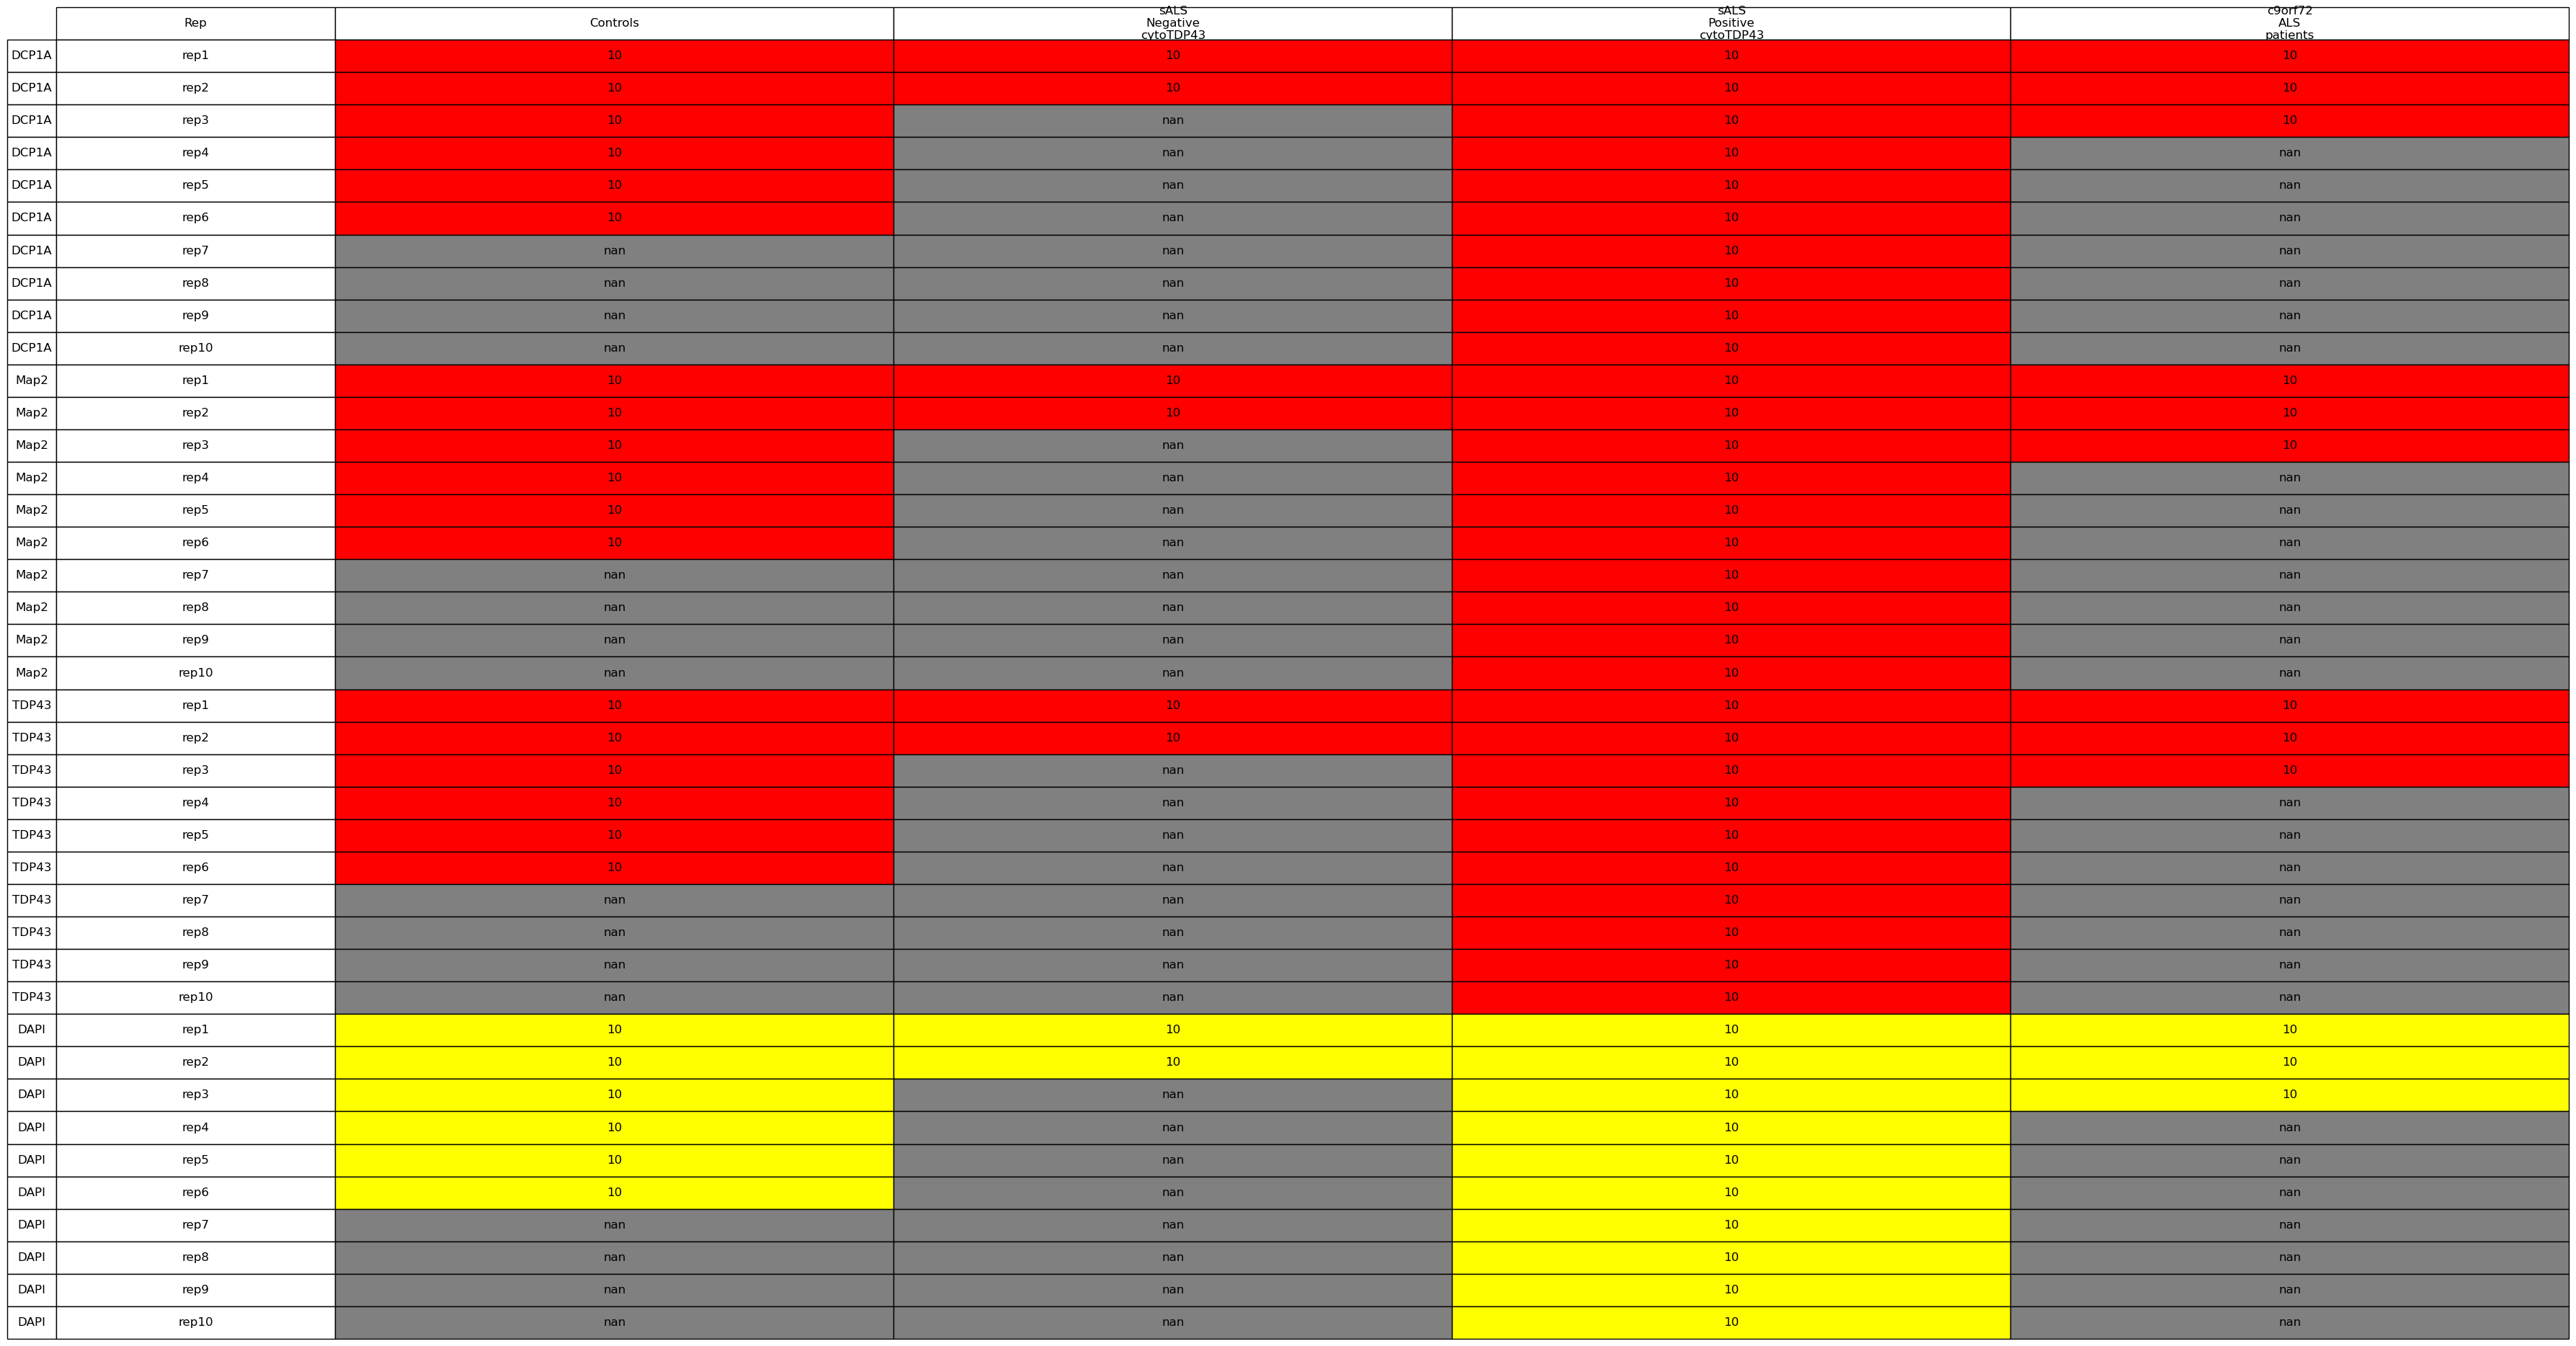

In [5]:

root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw', 'AlyssaCoyne', 'MOmaps_iPSC_patients_TDP43_PB_CoyneLab')


batches_raw = [batch.replace("_16bit_no_downsample","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, panels, markers.copy(),PLOT_PATH, marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches_raw, fig_width=15)

### Processed Files Validation

1. How many site **npy** files do we have in each folder? -> How many sites survived the pre-processing?
2. Are all existing files valid? (at least 100kB, npy not corrupted)

batch1
Folder structure is valid.
No bad files are found.
Total Sites:  840


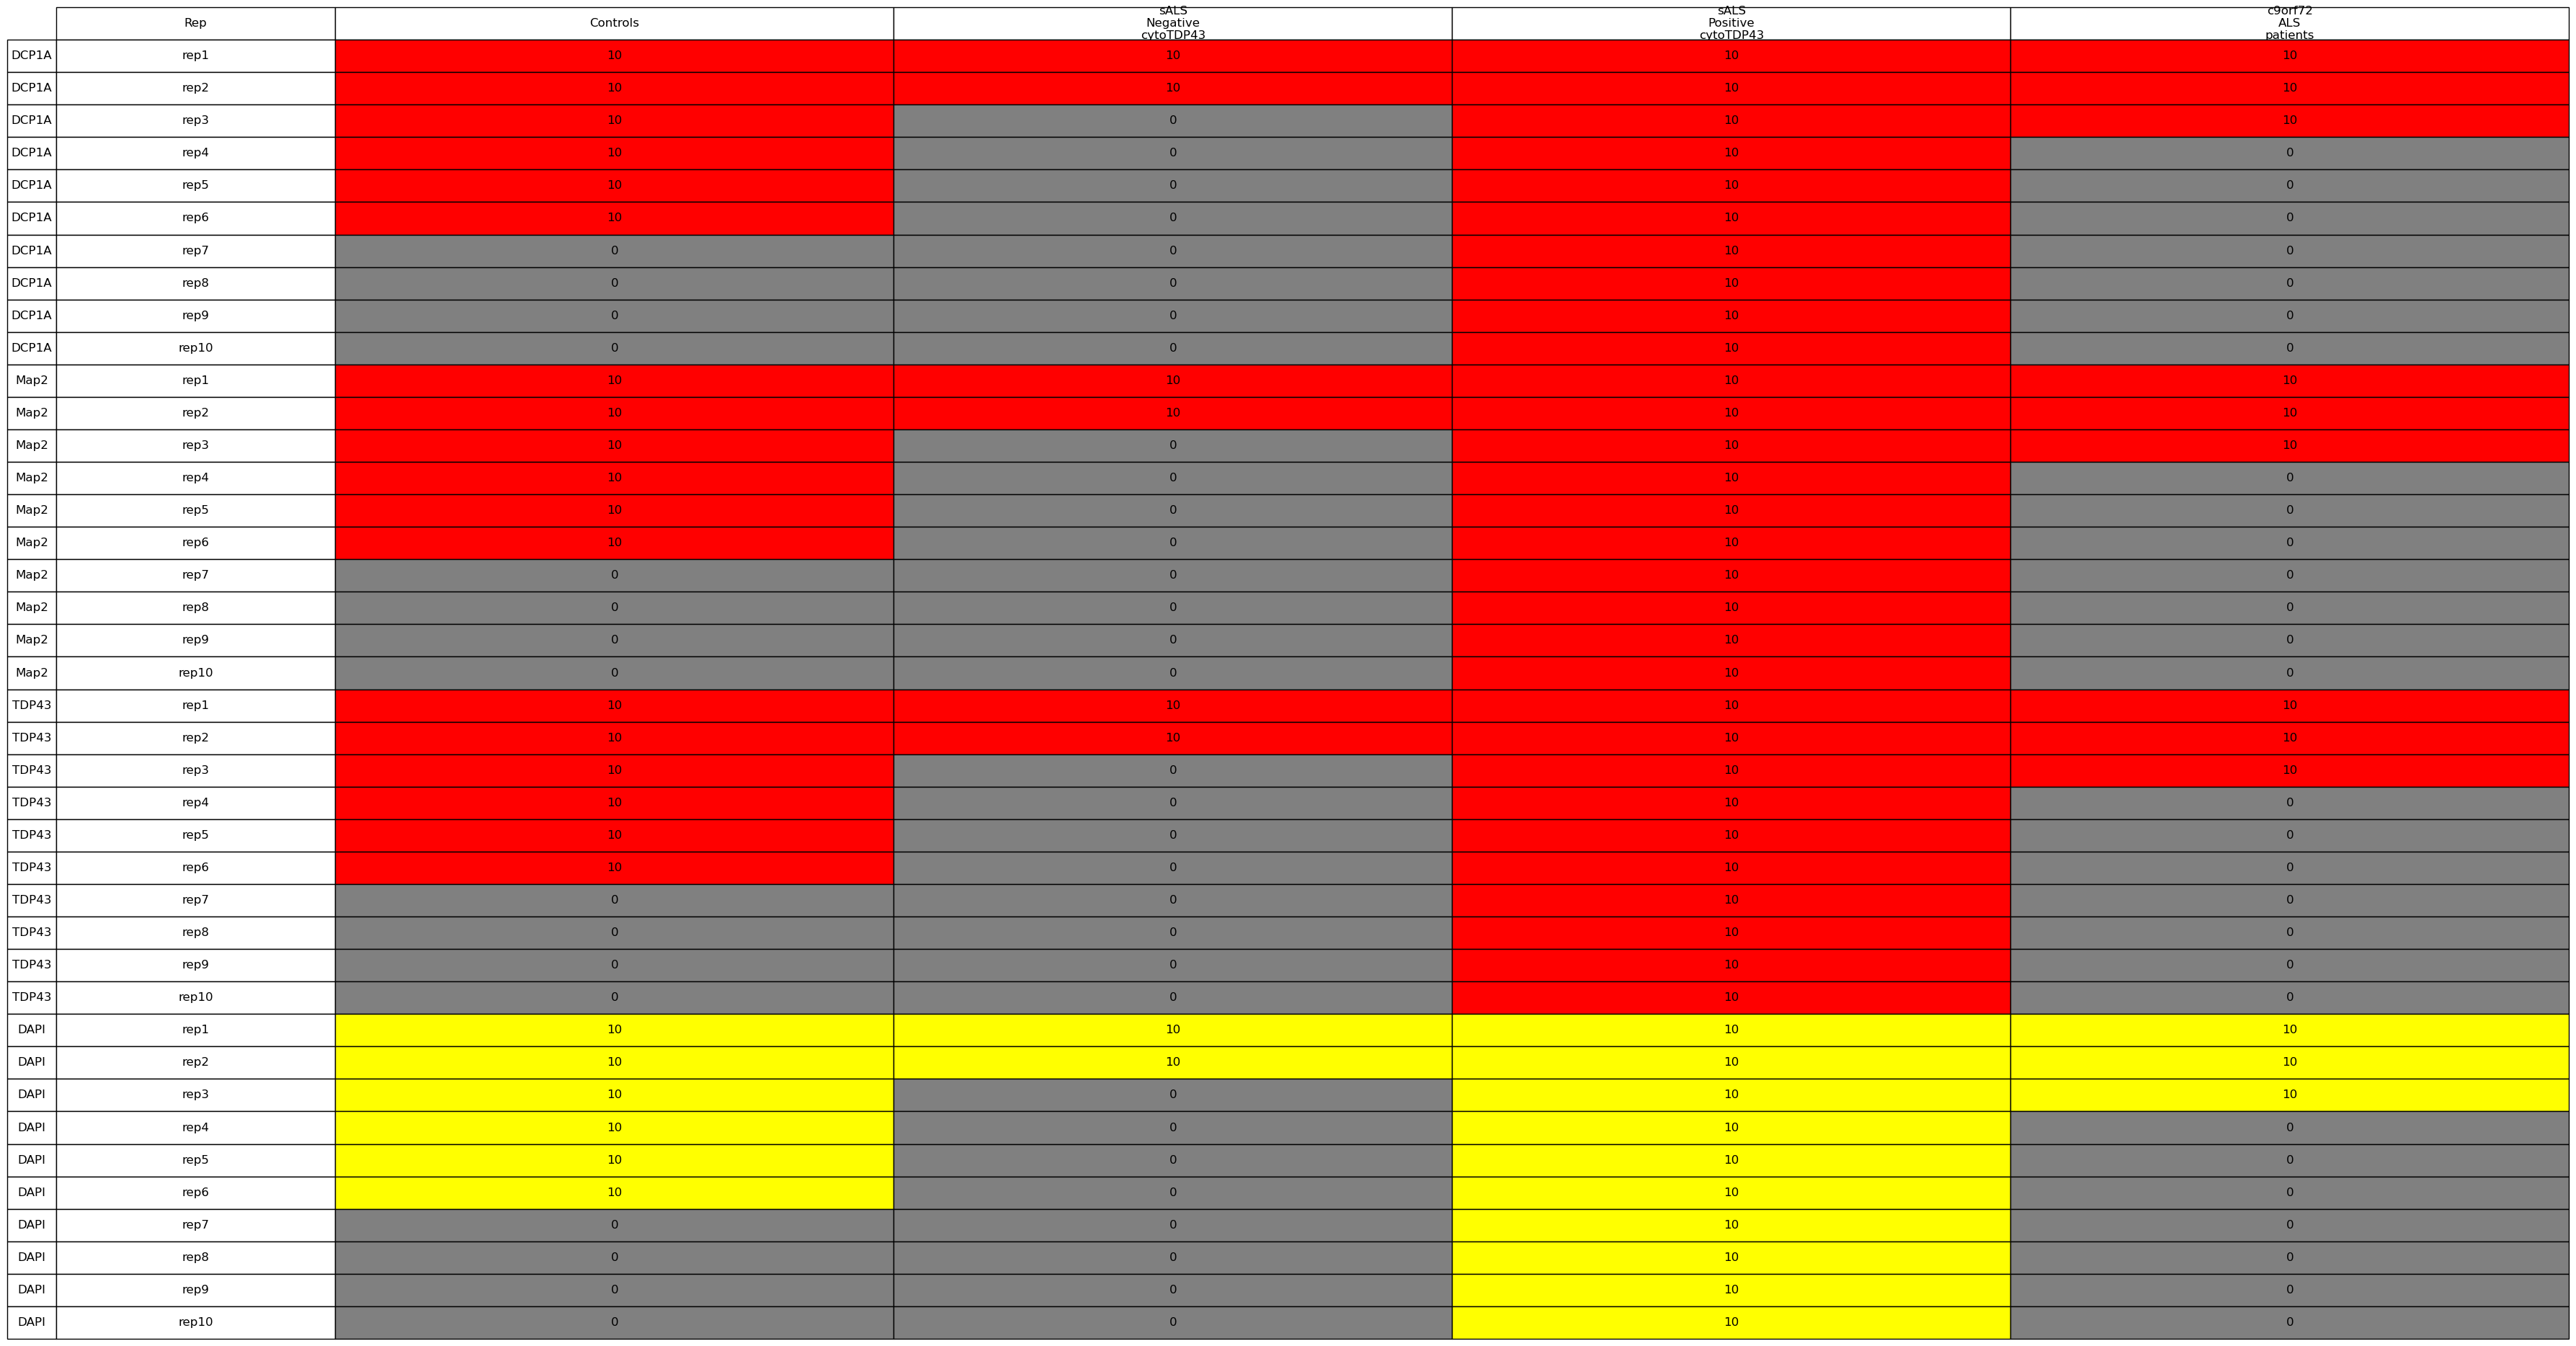

In [6]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'AlyssaCoyne', 'MOmaps_iPSC_patients_TDP43_PB_CoyneLab_7tiles')
procs = run_validate_folder_structure(root_directory_proc, True, panels, markers,PLOT_PATH, marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches, fig_width=15)

### Difference between Raw and Processed

batch1


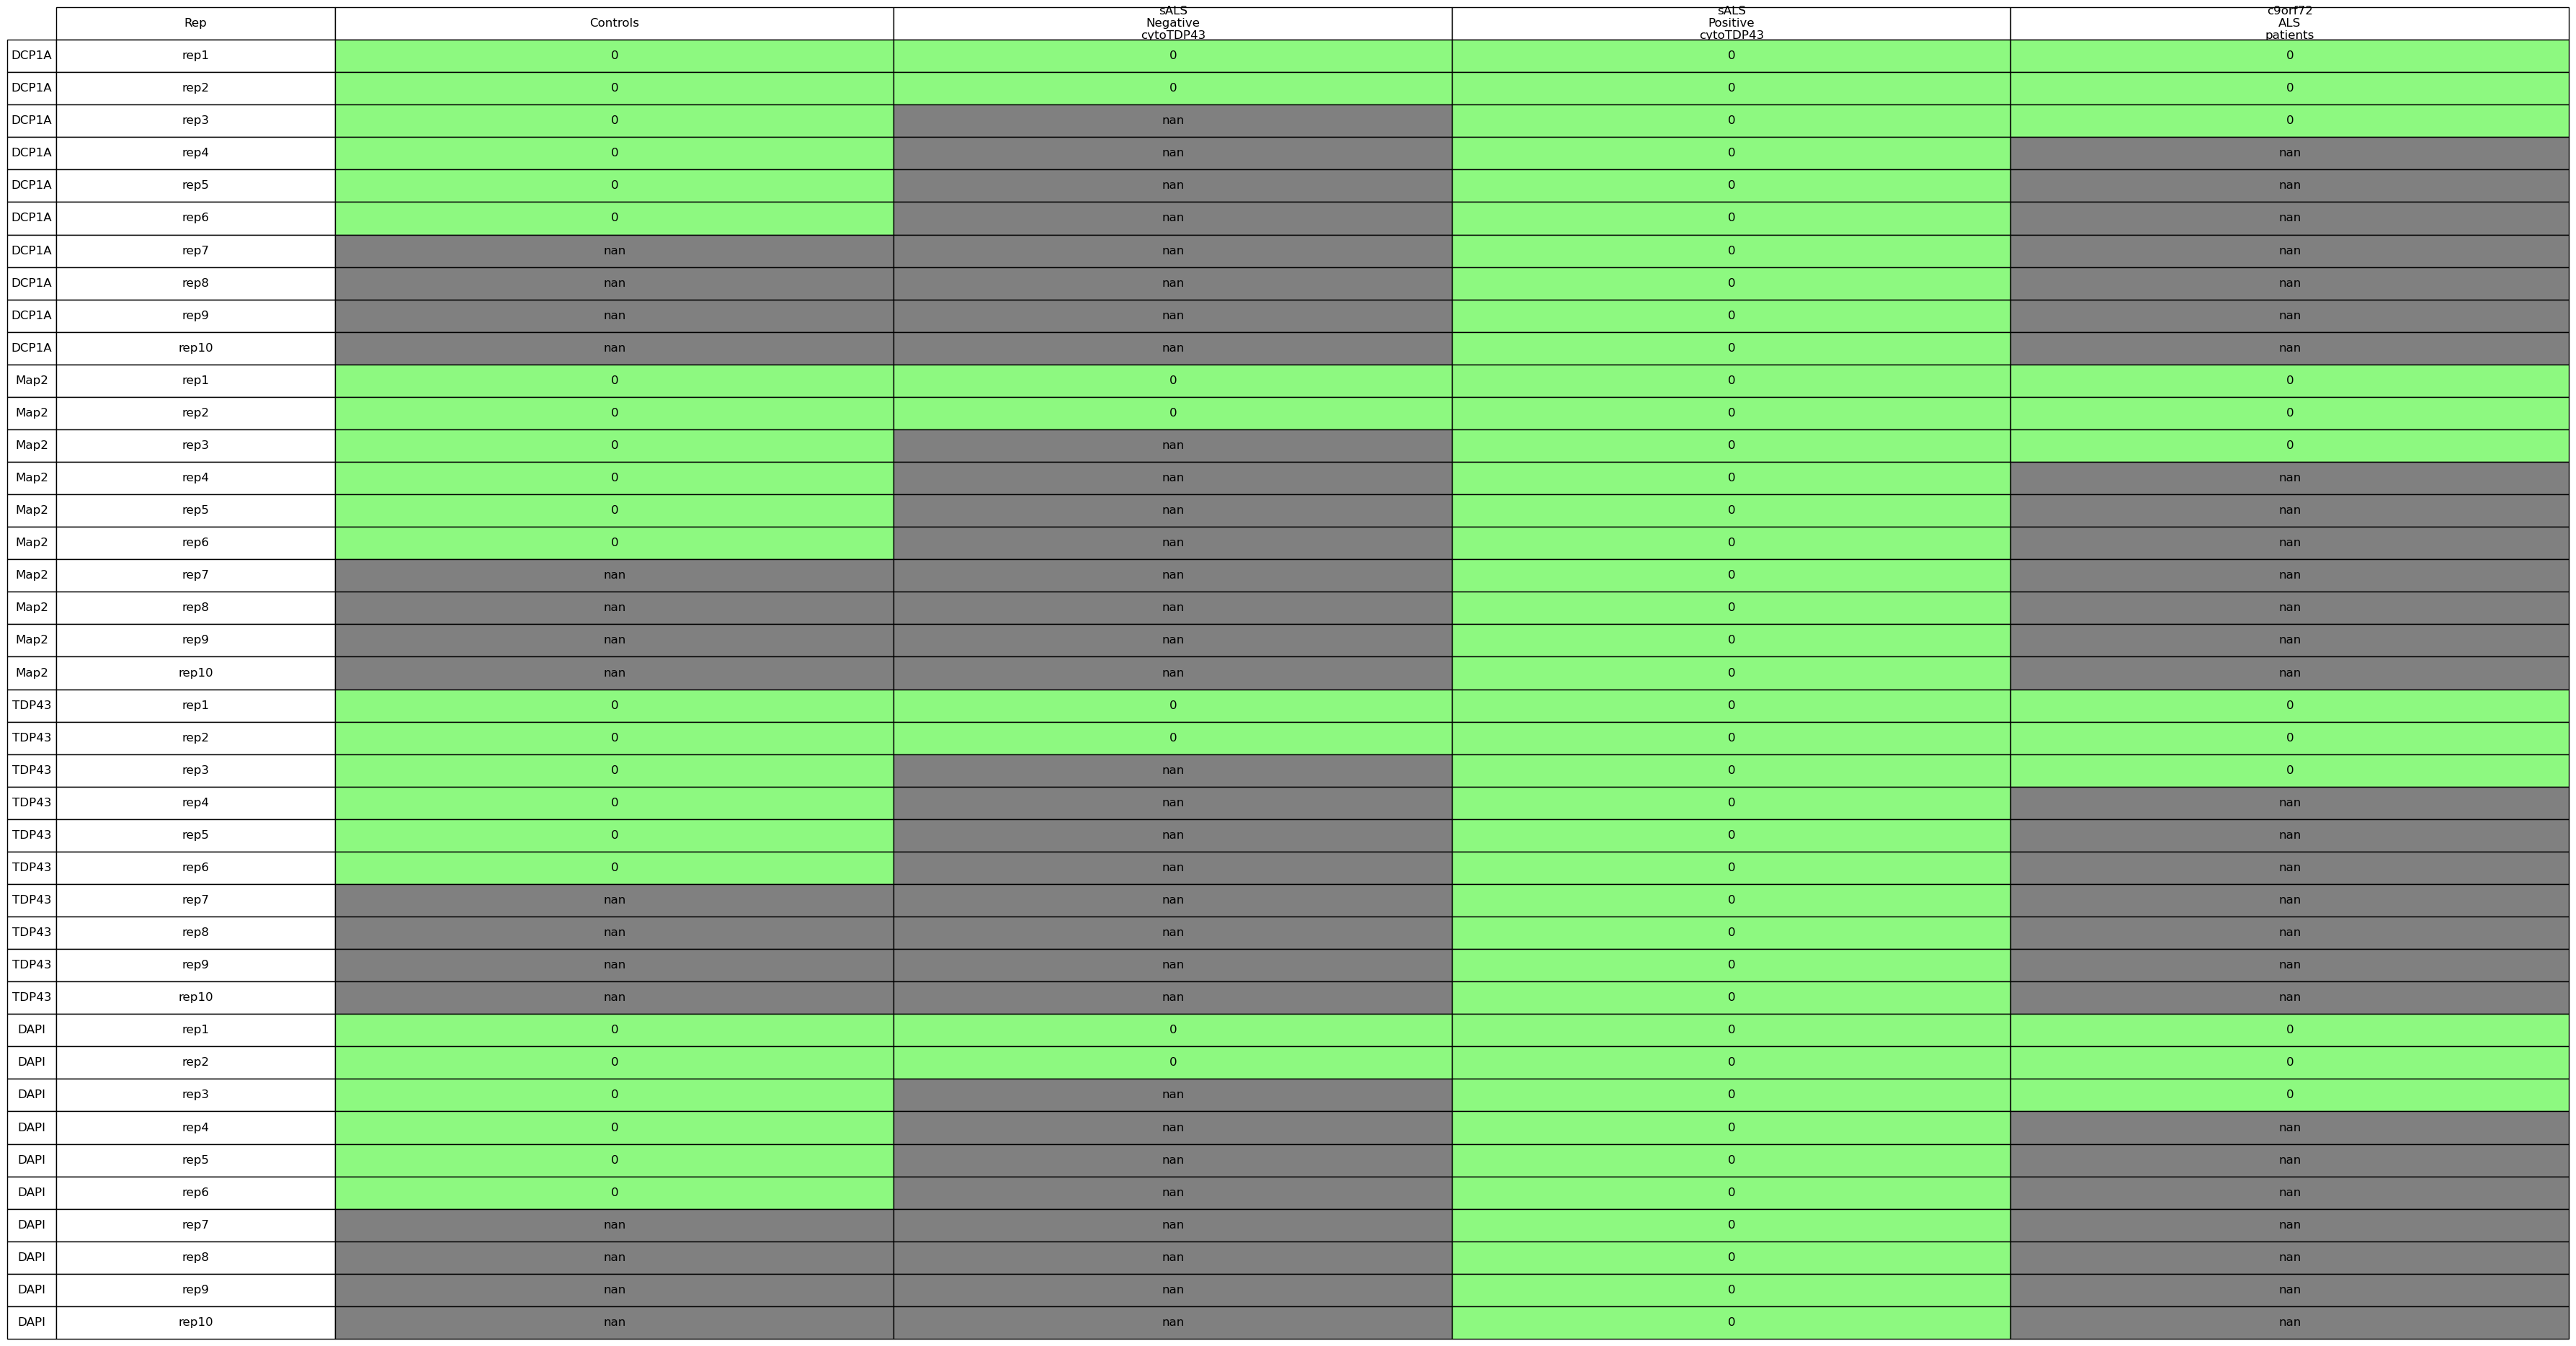

In [7]:
display_diff(batches, raws, procs, PLOT_PATH, fig_width=15)

## Variance in each batch

In [8]:
#for batch in list(range(3,9)) + ['7_16bit','8_16bit','9_16bit']:  

for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, cond_count=1, rep_count=len(reps), 
                                       num_markers=len(markers))
    print(f'{batch} var: ',var)

batch1 var:  0.02888039894150929


# filtering qc
By order of filtering

## 1. % site survival after Brenner on DAPI channel
Percentage out of the total sites

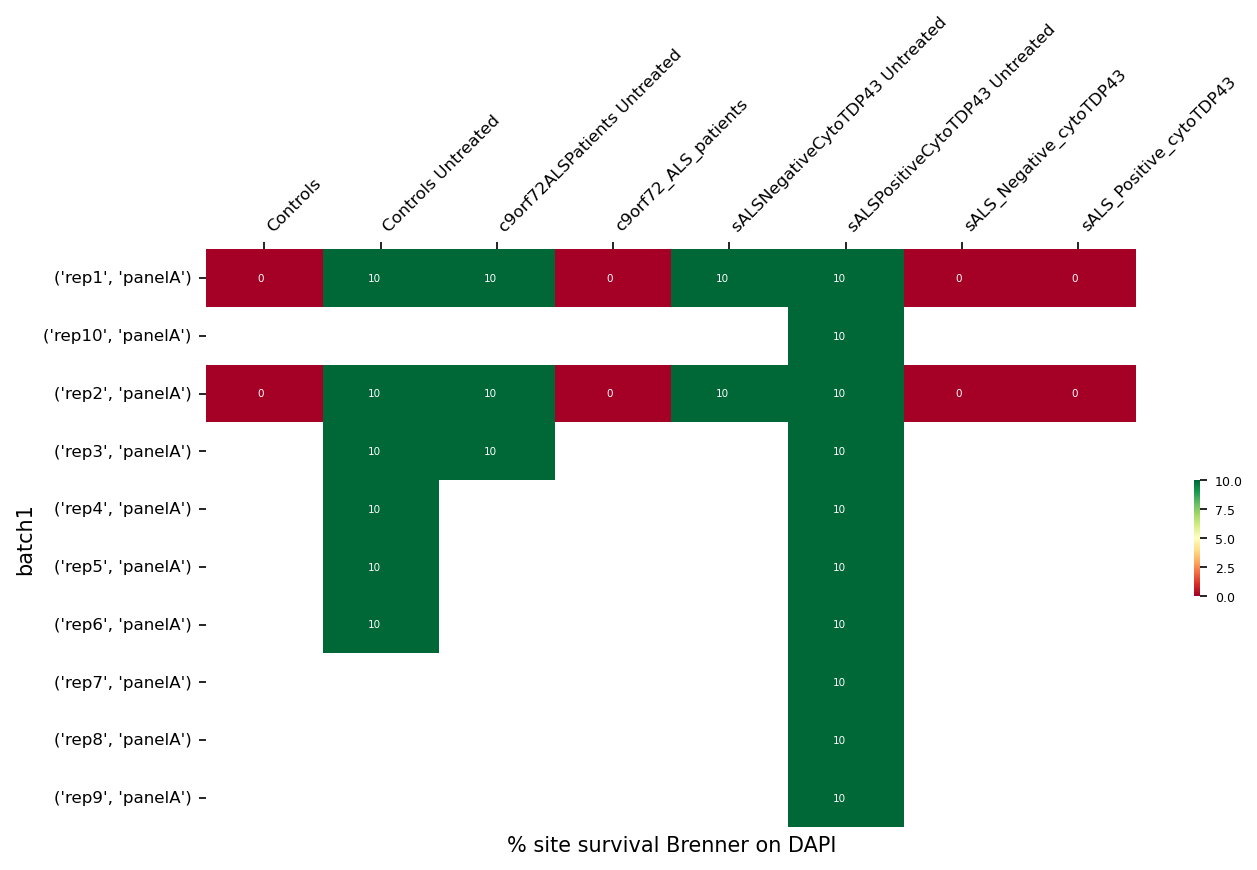

In [9]:
dapi_filter_by_brenner = show_site_survival_dapi_brenner(df_dapi,batches, line_colors, panels,
                                                        figsize=(10,5), vmax=10)

## 2. % Site survival after Cellpose
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values.

**A site will be filtered out if Cellpose found 0 cells in it.**

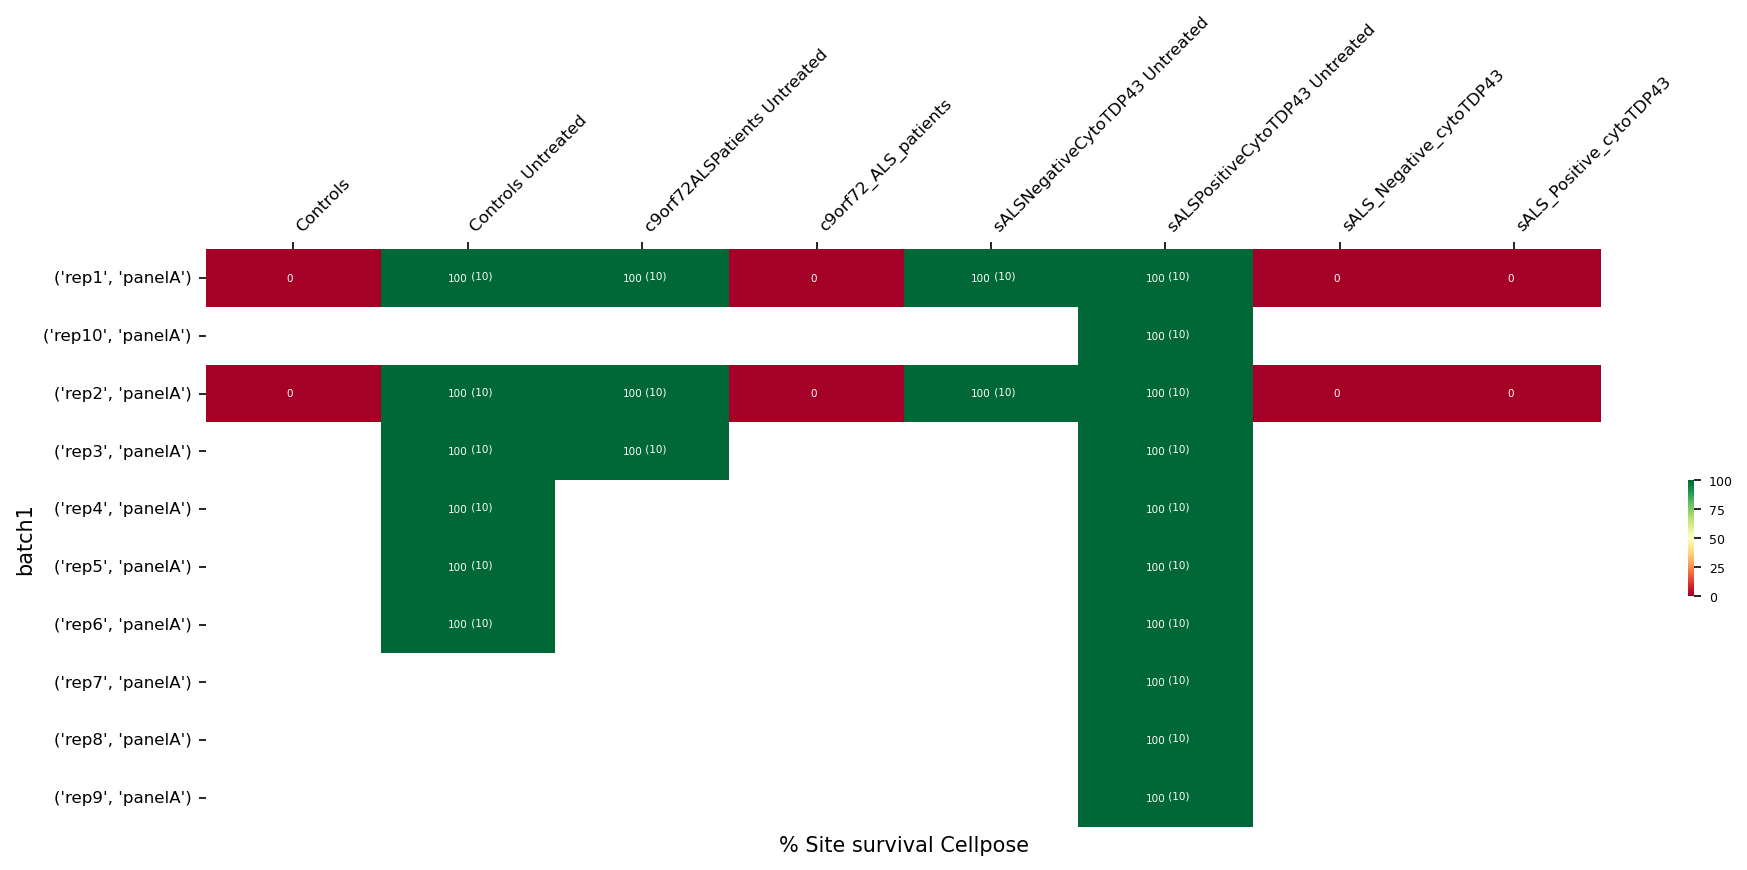

In [10]:
dapi_filter_by_cellpose = show_site_survival_dapi_cellpose(df_dapi, batches, dapi_filter_by_brenner, 
                                                           line_colors, panels, figsize=(15,5))

## 3. % Site survival by tiling
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values.

**A site will be filtered out if after tiling, no tile is containing at least 85% of a cell that Cellpose detected.**

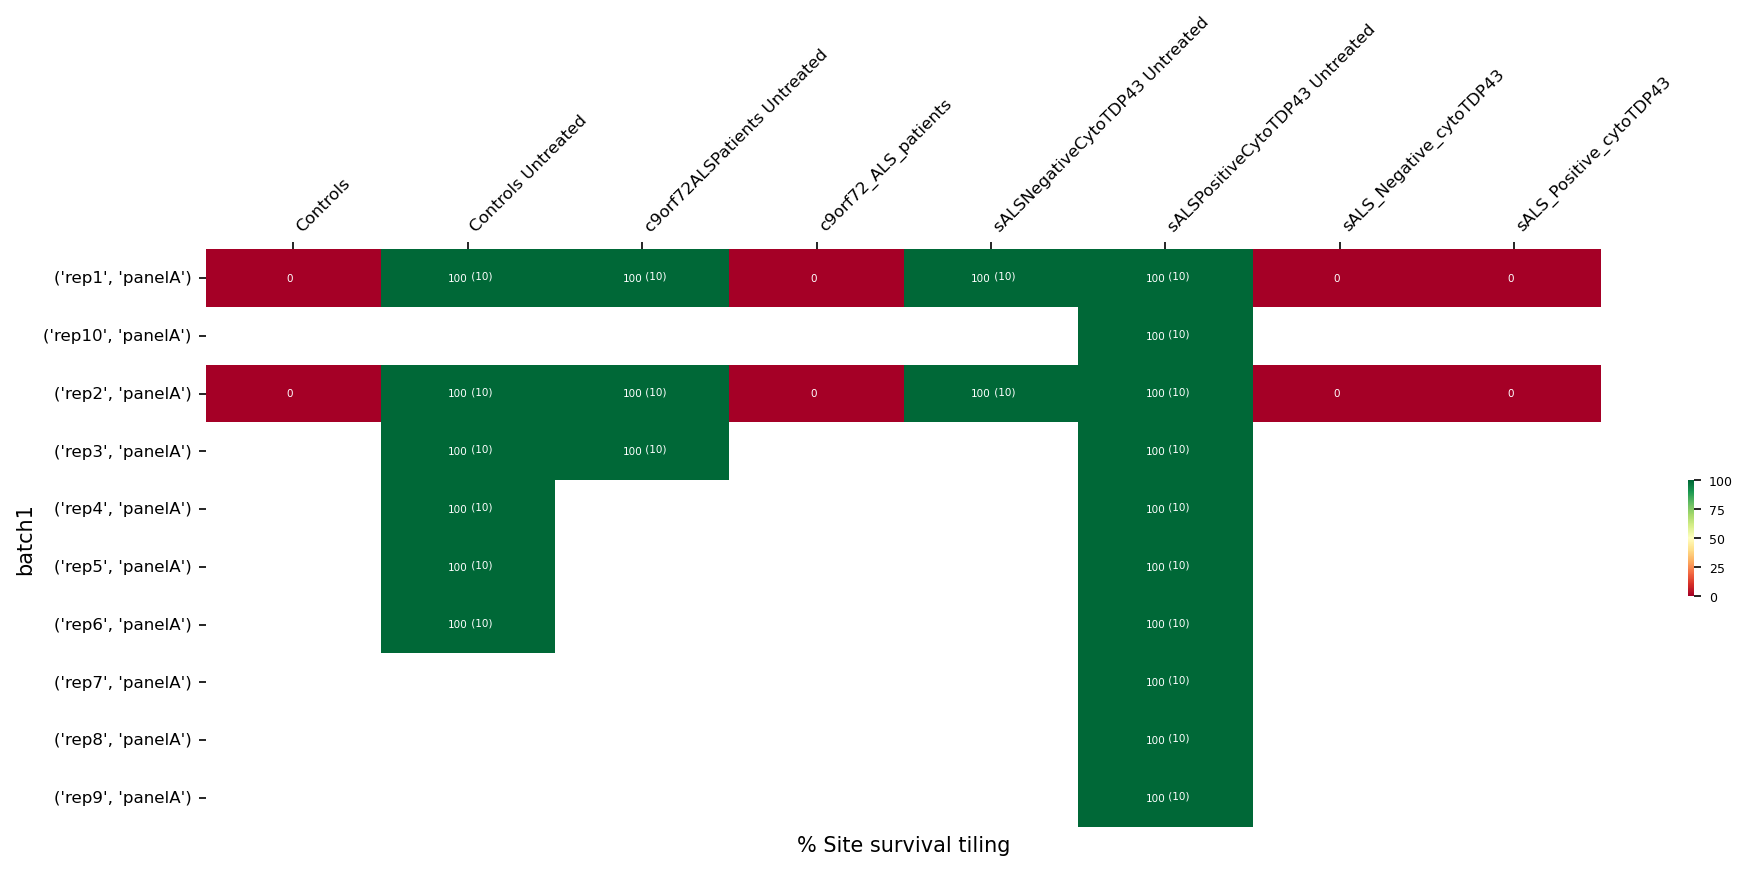

In [11]:
dapi_filter_by_tiling=show_site_survival_dapi_tiling(df_dapi, batches, dapi_filter_by_cellpose, 
                                                     line_colors, panels, figsize=(15,5))

## 4. % Site survival after Brenner on target channel
Percentage out of the sites that passed the previous filter. In parenthesis are absolute values (if different than the percentages).

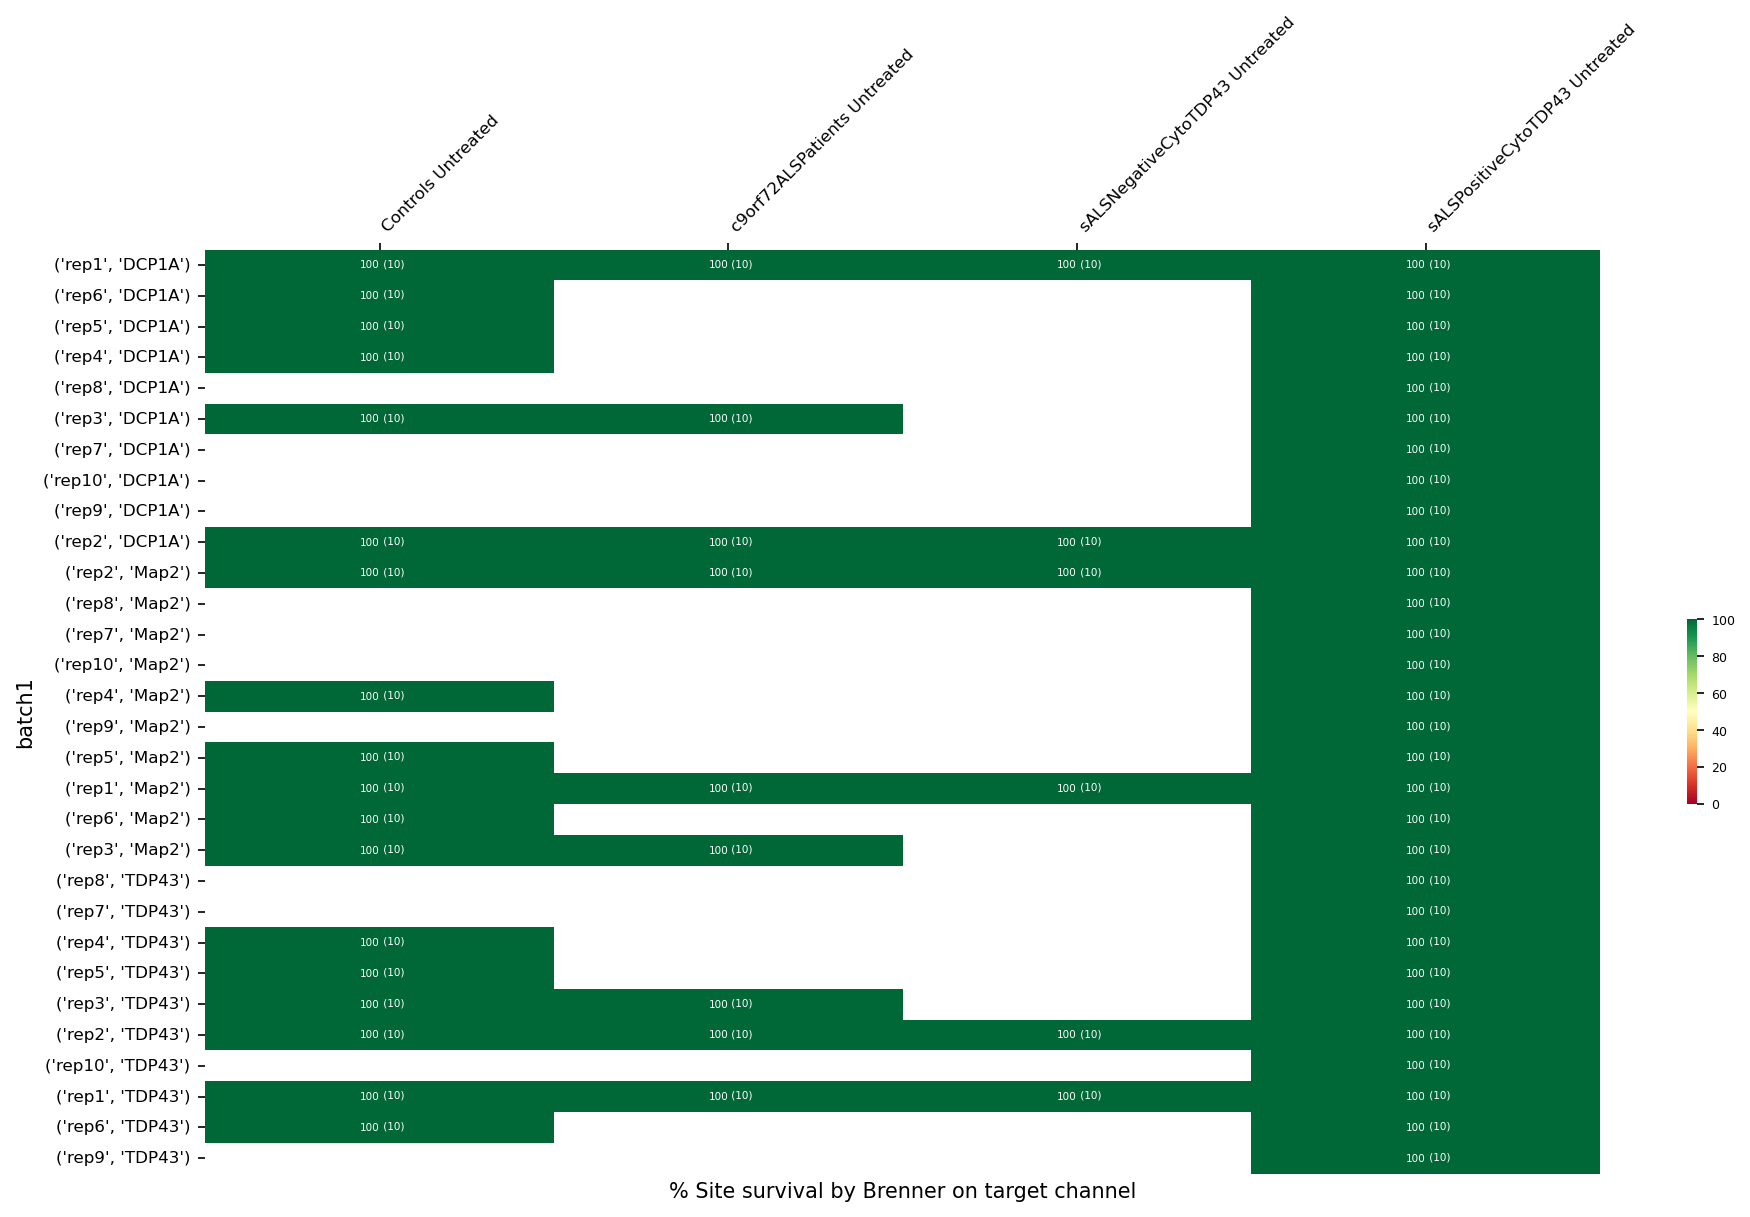

In [12]:
show_site_survival_target_brenner(df_dapi, df_target, dapi_filter_by_tiling,
                                 figsize=(15,8), markers=markers)

### Numbers!

1. Total number of tiles: for each condition, we can know how many **tiles** we have --> number of data points for the model to train and infer on --> number of points in UMAPs..
2. Total number of whole cells: for each condtion, we can know how many **whole cells** we have

In [13]:
names = ['Total number of tiles', 'Total number of whole cells']
stats = ['n_valid_tiles','site_whole_cells_counts_sum','site_cell_count','site_cell_count_sum']
total_sum = calc_total_sums(df_target, df_dapi, stats)
    

# for stat, name in zip(stats[:2], names):
#     to_heatmap = total_sum.rename(columns={stat:'index'})
#     plot_filtering_heatmap(to_heatmap, extra_index='marker', vmin=None, vmax=None,
#                           xlabel = name, show_sum=True, figsize=(4,8))

In [14]:
show_total_sum_tables(total_sum)

,n_valid_tiles,% valid tiles,site_whole_cells_counts_sum,site_cell_count
batch1,,,,
count,42.000000,42.000000,42.000000,42.000000
mean,70.095238,0.700952,94.428571,378.619048
std,12.855310,0.128553,20.521426,77.130536
min,49.000000,0.490000,65.000000,224.000000
25%,64.000000,0.640000,83.000000,325.000000
50%,69.000000,0.690000,88.000000,369.000000
75%,73.000000,0.730000,104.000000,427.000000
max,112.000000,1.120000,140.000000,507.000000
sum,2944.000000,NaN,3966.000000,15902.000000


,n valid tiles,% valid tiles,site_whole_cells_counts_sum,site_cell_count
All batches,,,,
count,42.000000,42.000000,42.000000,42.000000
mean,70.095238,0.700952,94.428571,378.619048
std,12.855310,0.128553,20.521426,77.130536
min,49.000000,0.490000,65.000000,224.000000
25%,64.000000,0.640000,83.000000,325.000000
50%,69.000000,0.690000,88.000000,369.000000
75%,73.000000,0.730000,104.000000,427.000000
max,112.000000,1.120000,140.000000,507.000000
sum,2944.000000,NaN,3966.000000,15902.000000


# <font color='red'>Number of Cells in Site for each batch and cell line</font>

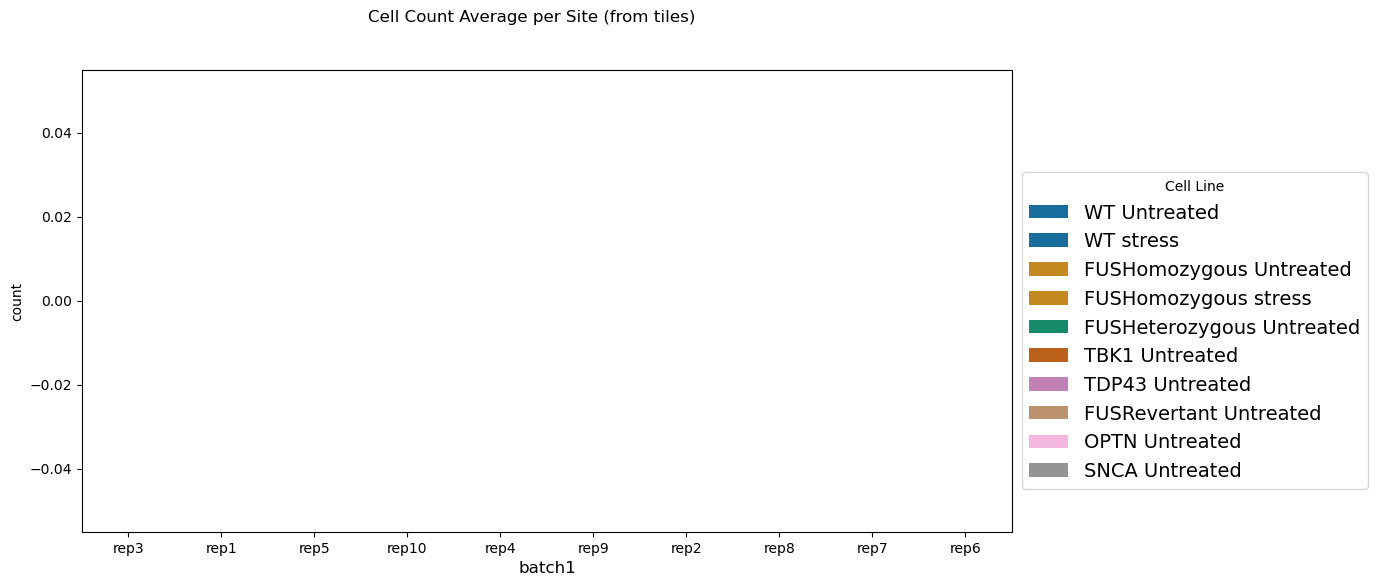

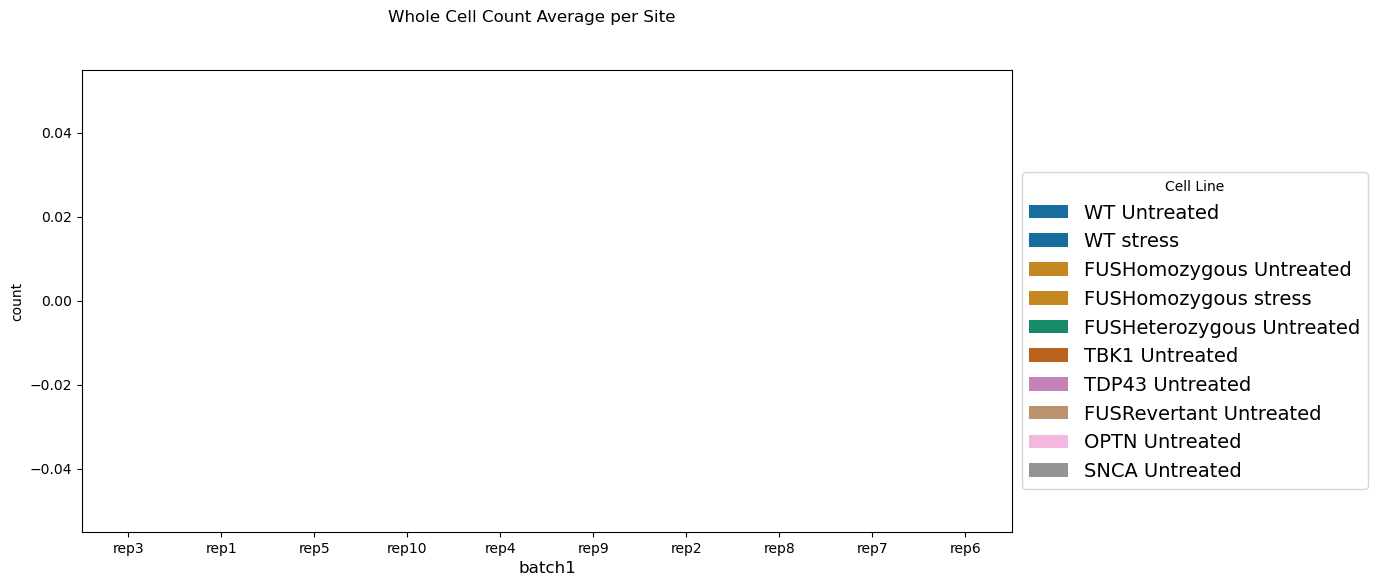

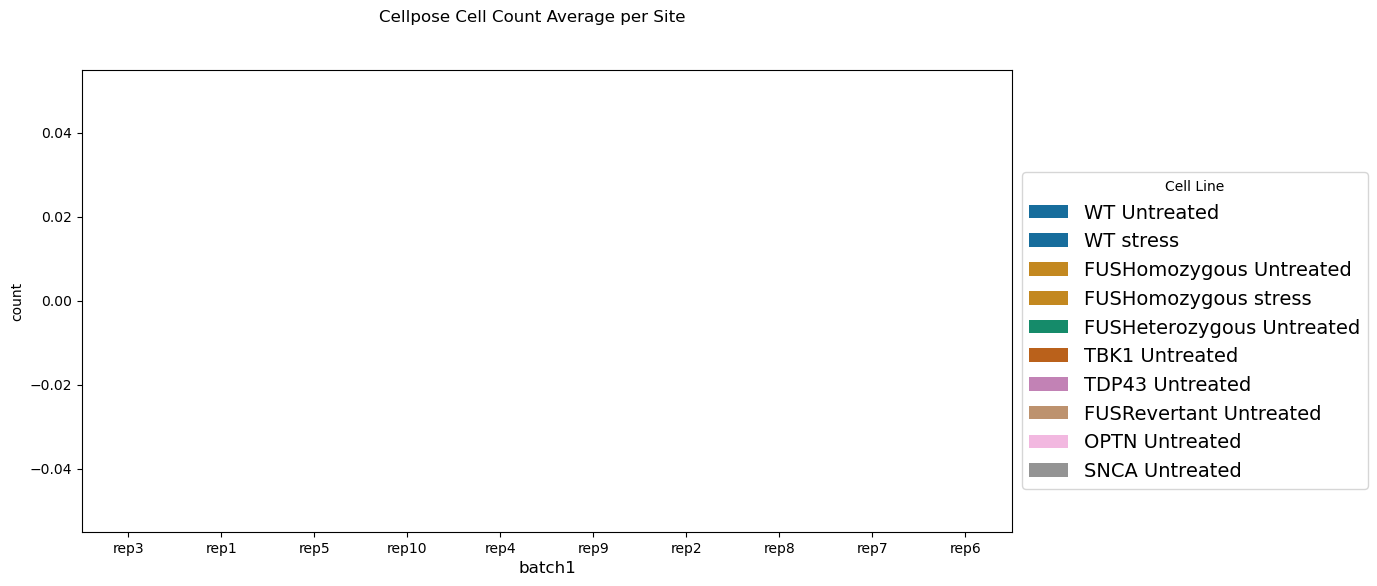

In [15]:
df_no_empty_sites = df_dapi[df_dapi.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, spd18days_lines_order, spd18days_custom_palette, y='site_cell_count_sum', 
                title='Cell Count Average per Site (from tiles)')

plot_cell_count(df_no_empty_sites, spd18days_lines_order, spd18days_custom_palette, y='site_whole_cells_counts_sum',
                title='Whole Cell Count Average per Site')

plot_cell_count(df_no_empty_sites, spd18days_lines_order,spd18days_custom_palette, y='site_cell_count',
               title='Cellpose Cell Count Average per Site')


# <font color='blue'>number of valid tiles per image (site)</font>


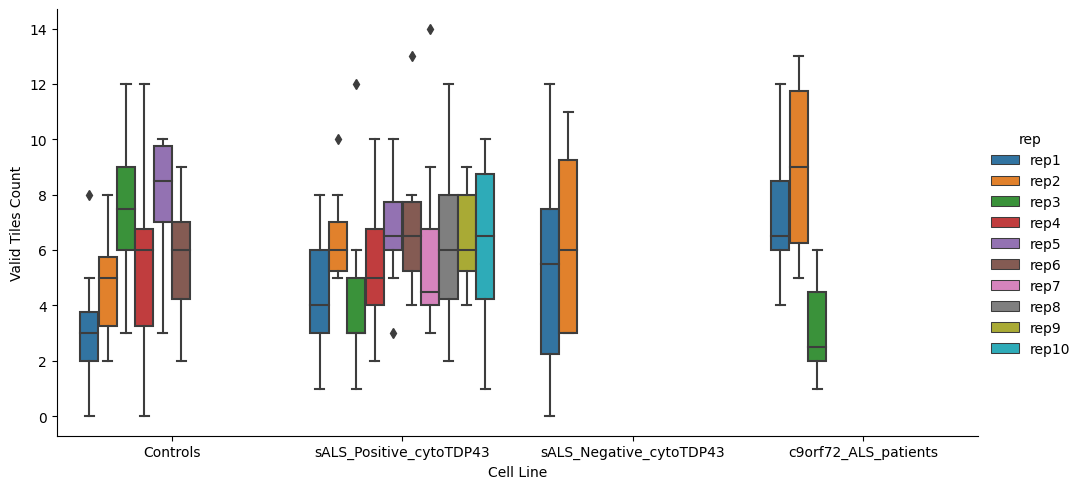

In [68]:
plot_catplot(df_dapi, x='cell_line', y_title='Valid Tiles Count', x_title='Cell Line', main_data=False, y='n_valid_tiles', hue='rep', hue_order=reps, height=5, aspect=2)

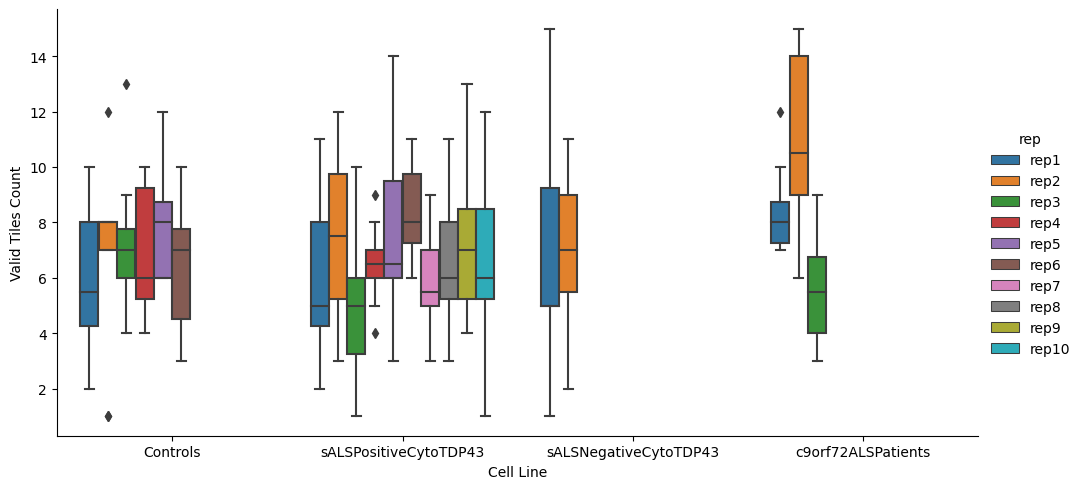

In [17]:
plot_catplot(df_dapi, x='cell_line', y_title='Valid Tiles Count', x_title='Cell Line', main_data=False, y='n_valid_tiles', hue='rep', hue_order=reps, height=5, aspect=2)

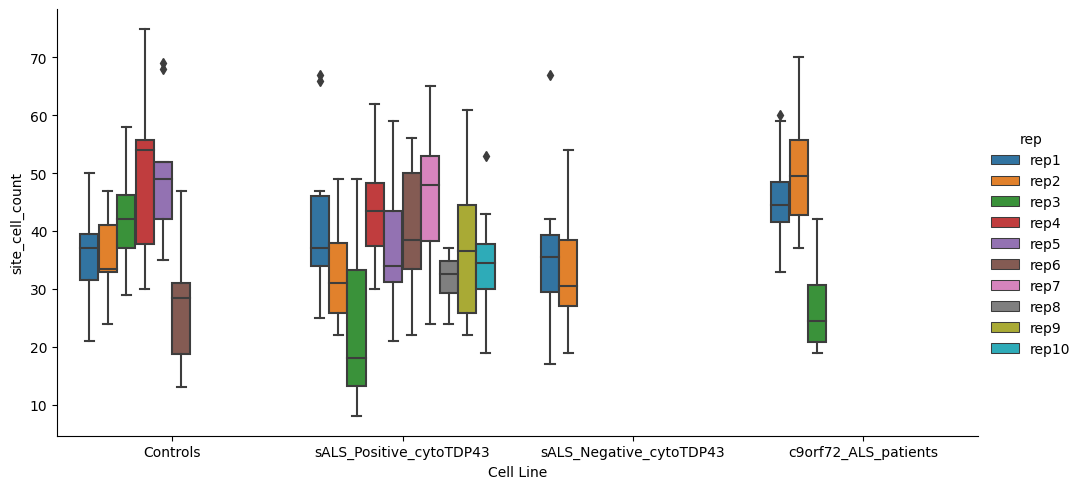

In [76]:
plot_catplot(df_dapi, x='cell_line', x_title='Cell Line', main_data=False, y='site_cell_count', hue='rep', hue_order=reps, height=5, aspect=2)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


In [ ]:
plot_hm(df_dapi, rows='cell_line', columns='rep')

# Assessing Staining Reproducibility and Outliers

In [ ]:
for batch in batches:
    print(batch)
    #batch_num = batch.replace('batch',"")
    run_calc_hist_new(f'FUS_lines_stress_2024_sorted/{batch}', fus_cell_lines_for_disp, fus_markers, 
                           hist_sample=10,sample_size_per_markers=200, ncols=8, nrows=4, dnls=True)
    print("="*30)

In [ ]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/no_ds/qc_report_newPP_dNLS.ipynb')